#**30 Categories**

## Setup

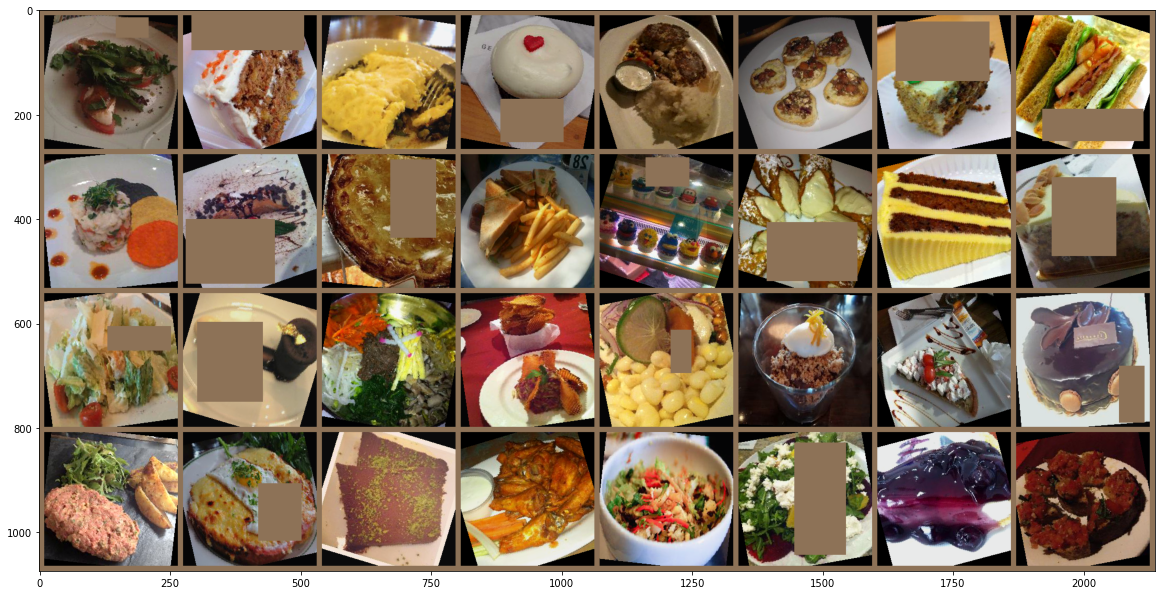

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from  torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets


ROOT_PATH = './drive/MyDrive/comp6721-project/datasets/dataset-30/'
training_path = f'{ROOT_PATH}/train'
validation_path = f'{ROOT_PATH}/val'
evaluation_path = f'{ROOT_PATH}/test'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 30
batch_size = 32
image_size = 256
mean = [0.554, 0.450, 0.343]
std = [0.231, 0.241, 0.241]

main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean,std),
    transforms.RandomErasing()
])

# Model
model = models.resnet18(pretrained=False)
in_features = int(model.fc.in_features)
model.fc = nn.Linear(in_features, num_classes, device)
model = model.to(device)

# Loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=5, gamma=0.1)

# Dataset
train_dataset = datasets.ImageFolder(training_path, transform=aug_transform)
evaluation_dataset = datasets.ImageFolder(evaluation_path, transform=main_transform)

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=2)
evaluation_dataloader = DataLoader(evaluation_dataset, batch_size = batch_size, shuffle=False, num_workers=2)

# Image samples
images, targets = next(iter(train_dataloader))
grid_images = torchvision.utils.make_grid(images, nrow=8, padding=10)

def imshow(images, mean, std):
        np_image = np.array(images).transpose((1,2,0))
        unnorm_image = np_image * std + mean
        plt.figure(figsize=(20,20))
        plt.imshow(unnorm_image)
        
imshow(grid_images, mean, std)

## Training

In [ ]:
%%time

num_epochs = 15
losses = []

for epoch in range(num_epochs):
    for i , (inputs, targets) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        #train model
        outputs = model(inputs)
        
        #criterion
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        
        #update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))


Epoch [ 1/15], Step [ 50/764], Loss: 3.3940
Epoch [ 1/15], Step [100/764], Loss: 3.4423
Epoch [ 1/15], Step [150/764], Loss: 3.2623
Epoch [ 1/15], Step [200/764], Loss: 3.3660
Epoch [ 1/15], Step [250/764], Loss: 3.2210
Epoch [ 1/15], Step [300/764], Loss: 3.1599
Epoch [ 1/15], Step [350/764], Loss: 3.1697
Epoch [ 1/15], Step [400/764], Loss: 3.0995
Epoch [ 1/15], Step [450/764], Loss: 2.9254
Epoch [ 1/15], Step [500/764], Loss: 3.1302
Epoch [ 1/15], Step [550/764], Loss: 3.3155
Epoch [ 1/15], Step [600/764], Loss: 3.1804
Epoch [ 1/15], Step [650/764], Loss: 2.9835
Epoch [ 1/15], Step [700/764], Loss: 2.9019
Epoch [ 1/15], Step [750/764], Loss: 2.9672
Epoch [ 2/15], Step [ 50/764], Loss: 3.1340
Epoch [ 2/15], Step [100/764], Loss: 3.0869
Epoch [ 2/15], Step [150/764], Loss: 2.7903
Epoch [ 2/15], Step [200/764], Loss: 3.0815
Epoch [ 2/15], Step [250/764], Loss: 3.0462
Epoch [ 2/15], Step [300/764], Loss: 2.8189
Epoch [ 2/15], Step [350/764], Loss: 2.8030
Epoch [ 2/15], Step [400/764], L

## Valuation

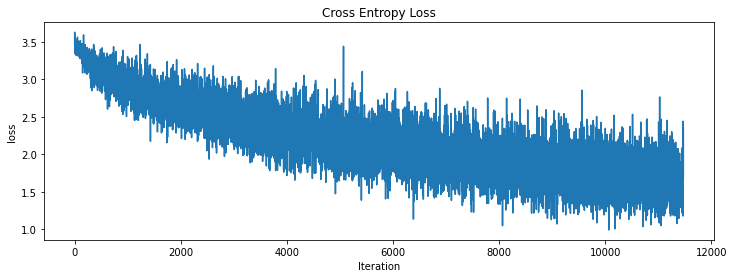

Train accuracy: 50.17
Test accuracy: 49.34
Confusion Matrix:
[[15  0 13  1  0  0  6  0 23  0  0  0 10  0  4  0  0  4  1  0  2  1  1  0
  10  0  2  2  1  2]
 [ 0 62  2  0  1  2  2  0  3  0  2  0  1  0  1  1  0  2  2  0 17  9  1  1
   0  0  3  1  1  0]
 [ 3  1 43  0  0  0  5  3  7  0  1  5  6  1  6  1  0  0  3  0  0  1  1  0
   3  0  2  1  0  2]
 [ 0  1  0 63  0 11  0  0  0  0  2  0  2  7  0  4  0  6  1  0  0  0  0  0
   0  0  1  0  0  1]
 [ 0  1  0  9 41  5  0  1  3  0 10  1  2  4  1  2  4  1  0  0  2  2  2  0
   0  0 13  3  4  5]
 [ 0  0  1  4  0 60  1  0  1  0  1  3  0  9  0  2  2  2  1  0  0  1  2  0
   0  0  5  1  0  0]
 [ 0  0  1  0  0  0 77  0  3  1  1  0  9  0  0  0  0  0  0  0  0  2  3  0
   2  0  0  1  1  1]
 [ 0  0  0  0  0  1  0 64  0  0  3  3  0  1  2  0  1  2  1  0  0  1  3  0
   1  0  3  1  1  3]
 [ 1  2  2  0  0  0  4  2 42  0  0  1  7  0  1  0  1  1  0  0  1  2  4  0
   1  0  4  2  2  1]
 [ 5  1  2  1  0  2  2  4  7 10  9  2  7  5  1  7  0  0  6  2  0  0  1  0
   7  2  7

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

def evaluate_model(title, model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
            y_true.extend(targets.tolist())
            y_pred.extend(preds.tolist())

    print('{title} accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset), title=title))
    if title.lower() == "test":
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Compute the precision, recall, and F1 score
        report = classification_report(y_true, y_pred)
        print('Confusion Matrix:')
        print(cm)
        print('Classification Report:')
        print(report)


evaluate_model("Train", model, train_dataloader, device)
evaluate_model("Test", model, evaluation_dataloader, device)